<a href="https://githubtocolab.com/borislevant/python4cv/blob/main/advanced_to_dl_with_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Introduction to Deep Learning

In this notebook we will start our jorney towards the Deep Learning. We will start with the Logistic Regression - remind ourselves the theory and the implementation of the Logistic Regression with the ```scikit-learn``` and then move on to learn the ```Tensorflow```. 

[![tensorflow_logo](./img/tensorflow_logo.jpeg)](https://www.tensorflow.org/)

```TensorFlow``` is an end-to-end open source platform for machine learning1. It makes it easy for beginners and experts to create machine learning models for desktop, mobile, web, and cloud2. TensorFlow supports distributed training, immediate model iteration and easy debugging with Keras, and much more2. You can also find collections of pre-trained models at TensorFlow Hub from Google and the community, or implementations of state-of-the art research models in the Model Garden2. 

In this notebook we will start with the dataset of the handwritten digits, that we already saw in the Machine learning course


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
%matplotlib inline


The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8%.

![](./img/mnist_examples.png)

In this notebook we will work with the full version of 70K examples


In [83]:
# If you have an internet connection
# We can load the full data set via the Scikit-learn data_set package

# from sklearn.datasets import fetch_openml
# X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=True)
# X.to_csv('./data/mnist_full_data.csv', index=False)
# y.to_csv('./data/mnist_full_labels.csv', index=False)

X = pd.read_csv('./data/mnist_7000_data.csv', index_col=False)
y = pd.read_csv('./data/mnist_7000_labels.csv', index_col=False)
X.shape, y.shape


((5000, 784), (5000, 1))

First we reshape the images from the flat array into the 2D array of emages 28x28

In [84]:
X = np.reshape(X.values, (-1, 28, 28, 1))
X.shape, y.shape

((5000, 28, 28, 1), (5000, 1))

Let's see how many different classes we have in the dataset

<AxesSubplot: xlabel='class'>

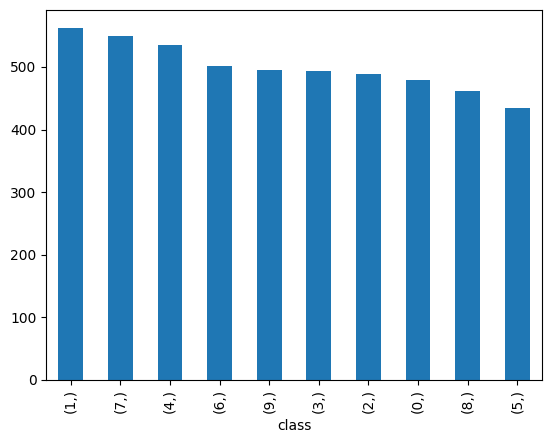

In [85]:
y.value_counts().plot.bar()

Each row in X contains 784 features - representing the 28x28 pixels pictures. In order to view the pictures, we will rescale the 784 vector into the 2D matrix of 28x28 and then use the Matplotlib API for displaying the images. Let's view the first 9 images of the dataset


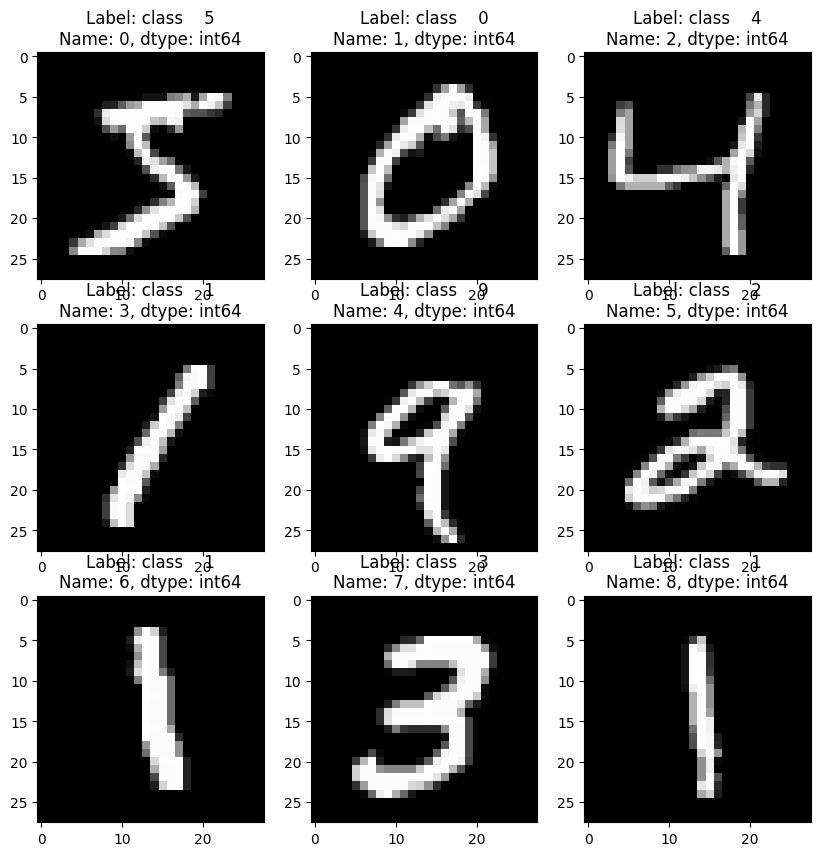

In [86]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(X[i*3+j, :].reshape((28, 28)), cmap='gray')
        ax[i, j].set_title(f'Label: {y.iloc[i*3+j]}')

## Tensorflow: Our first Convolutional Neural Network

In this part we will learn about the ```Tensorflow```. Our first goal is to implement the Logistic regression using the library and imrpove the result of the detection

To install ```Tensorflow``` run the following
```
pip install tensorflow
```

Instead of writing the pure Tensorflow code, we will use the common ```Keras``` high-level API that wraps the functionality of the package.


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In this part we will rescale the features of the model - dividing it by 255 (the largest possible value of the pixel) to bring everythiong into the range of 0 to 1

In [88]:
X_train = (X_train / 255).astype('float32')
X_test = (X_test / 255).astype('float32')


In [145]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten, InputLayer
from keras.utils.vis_utils import plot_model

num_classes=10

We will use the Sequential API of Keras. A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

* The first layer of the Network accepts the image. So we initialize it as accepting the images of the size of the MNIST images - in this case array of the length 784
* The second layer of the Network is just the softmax layer - making the classification

This architecture is equivalent to the simple Logistic regression as we built before with scikit-learn


In [117]:
#define the convnet
model_relu_cnn = Sequential()
# CONV => RELU => CONV => RELU => POOL
model_relu_cnn.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model_relu_cnn.add(Activation('linear'))
model_relu_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# FLATTERN => DENSE => RELU
model_relu_cnn.add(Flatten())
model_relu_cnn.add(Dense(512))
model_relu_cnn.add(Activation('linear'))
# a softmax classifier
model_relu_cnn.add(Dense(num_classes))
model_relu_cnn.add(Activation('softmax'))


Now let's visualize the architecture of the network

![](./img/neural_network_vis.png)

In [147]:
model_relu_cnn.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_67 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 6272)              0         
                                                                 
 dense_42 (Dense)            (None, 512)               3211776   
                                                                 
 activation_68 (Activation)  (None, 512)               0         
                                                     

Each i of the vector representing the "probability" that the input image is classified as a number i. Therefore, in order to use the original labels we need to convert the numbers 0, 1, 2, ..., 9 of the y_test/y_train into the one-hot encoding vectors, where the 0 corresponds to the vector $[1, 0, 0, 0, ..., 0]$, etc.


In [148]:
# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)


Now it's time to train the network. We do it by the following steps:

* Compiling the model, defining the optimizer to use (in this case - Stochastic gradient descent) and the metric to use to converge
* Fitting the model by calling the function ```fit``` with the batch size, number of epochs
* Saving the model (into the file of type hdf5) and the history of the train into the CSV file


In [149]:
model_first_cnn.compile(loss='categorical_crossentropy',
                        optimizer=keras.optimizers.SGD(),
                        metrics=['accuracy'])

history_first_cnn = model_first_cnn.fit(X_train, y_train_cat,
                                        batch_size=32,
                                        epochs=30,
                                        validation_data=(X_test, y_test_cat),
                                        shuffle=True)

model_first_cnn.save(r'./data/model_first_cnn_softmax', save_format='h5')
pd.DataFrame(history_first_cnn.history).to_csv('./data/history_first_cnn.csv')


Epoch 1/30
125/125 [==============================] - 4s 28ms/step - loss: 1.5982 - accuracy: 0.6220 - val_loss: 0.8082 - val_accuracy: 0.8330
Epoch 2/30
125/125 [==============================] - 3s 27ms/step - loss: 0.5964 - accuracy: 0.8497 - val_loss: 0.4697 - val_accuracy: 0.8810
Epoch 3/30
125/125 [==============================] - 3s 24ms/step - loss: 0.4181 - accuracy: 0.8805 - val_loss: 0.4036 - val_accuracy: 0.8980
Epoch 4/30
125/125 [==============================] - 3s 28ms/step - loss: 0.3627 - accuracy: 0.8950 - val_loss: 0.3869 - val_accuracy: 0.8960
Epoch 5/30
125/125 [==============================] - 3s 27ms/step - loss: 0.3288 - accuracy: 0.9078 - val_loss: 0.3572 - val_accuracy: 0.9030
Epoch 6/30
125/125 [==============================] - 3s 27ms/step - loss: 0.3107 - accuracy: 0.9115 - val_loss: 0.3544 - val_accuracy: 0.9070
Epoch 7/30
125/125 [==============================] - 4s 29ms/step - loss: 0.2945 - accuracy: 0.9135 - val_loss: 0.3384 - val_accuracy: 0.9100

Observe that the Network reaches the accuracy of **95%** on train and **92%** on the test. What can be done to improve?

* Increase the number of epochs
* Include the non-linear activation
* Regularization


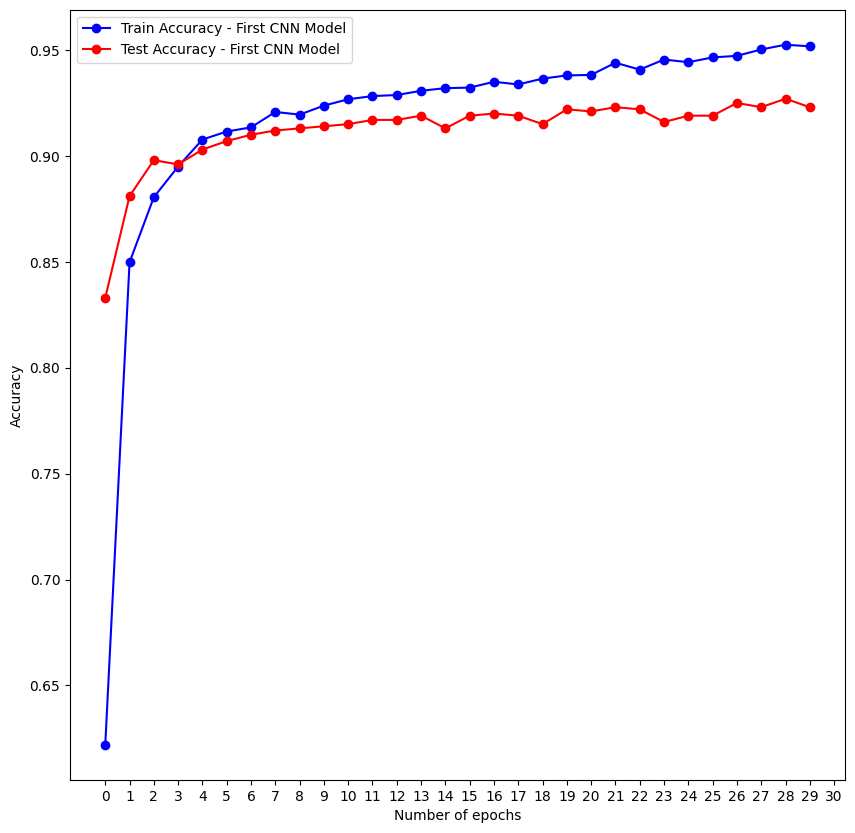

In [150]:
plt.figure(figsize=(10, 10))
plt.plot(history_first_cnn.history['accuracy'], 'bo-', label='Train Accuracy - First CNN Model')
plt.plot(history_first_cnn.history['val_accuracy'], 'ro-', label='Test Accuracy - First CNN Model')

plt.xticks(range(0, 31))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

plt.legend()

## CNN - Effect of Non-Linear Activation

Let's try to make a Netowrk more complex, by adding the Relu activation instead of linear activation


In [151]:
#define the convnet
model_relu_cnn = Sequential()
# CONV => RELU => CONV => RELU => POOL
model_relu_cnn.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model_relu_cnn.add(Activation('relu'))
model_relu_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# FLATTERN => DENSE => RELU
model_relu_cnn.add(Flatten())
model_relu_cnn.add(Dense(512))
model_relu_cnn.add(Activation('relu'))
# a softmax classifier
model_relu_cnn.add(Dense(num_classes))
model_relu_cnn.add(Activation('softmax'))

model_relu_cnn.summary()


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_79 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 6272)              0         
                                                                 
 dense_50 (Dense)            (None, 512)               3211776   
                                                                 
 activation_80 (Activation)  (None, 512)               0         
                                                     

In [152]:
model_relu_cnn.compile(loss='categorical_crossentropy',
                        optimizer=keras.optimizers.SGD(),
                        metrics=['accuracy'])

history_relu_cnn = model_relu_cnn.fit(X_train, y_train_cat,
                                        batch_size=32,
                                        epochs=30,
                                        validation_data=(X_test, y_test_cat),
                                        shuffle=True)

model_relu_cnn.save(r'./data/model_relu_cnn', save_format='h5')
pd.DataFrame(history_relu_cnn.history).to_csv('./data/history_relu_cnn.csv')


Epoch 1/30
125/125 [==============================] - 5s 36ms/step - loss: 1.8938 - accuracy: 0.5490 - val_loss: 1.1674 - val_accuracy: 0.7960
Epoch 2/30
125/125 [==============================] - 4s 32ms/step - loss: 0.7485 - accuracy: 0.8305 - val_loss: 0.5208 - val_accuracy: 0.8830
Epoch 3/30
125/125 [==============================] - 4s 30ms/step - loss: 0.4460 - accuracy: 0.8783 - val_loss: 0.4207 - val_accuracy: 0.8970
Epoch 4/30
125/125 [==============================] - 4s 30ms/step - loss: 0.3619 - accuracy: 0.9007 - val_loss: 0.3701 - val_accuracy: 0.9070
Epoch 5/30
125/125 [==============================] - 4s 30ms/step - loss: 0.3202 - accuracy: 0.9082 - val_loss: 0.3417 - val_accuracy: 0.9150
Epoch 6/30
125/125 [==============================] - 4s 32ms/step - loss: 0.2906 - accuracy: 0.9215 - val_loss: 0.3257 - val_accuracy: 0.9130
Epoch 7/30
125/125 [==============================] - 4s 32ms/step - loss: 0.2666 - accuracy: 0.9252 - val_loss: 0.3143 - val_accuracy: 0.9140

Let's see the effect of the non-linear activation on the accuracy. We observe that the CNN with ReLu activation converges much better than the CNN with the Linear activation. However, there is still a large gap between the Train and Test accuracy: **98%** on train and **94%** on test. We need to deal with it

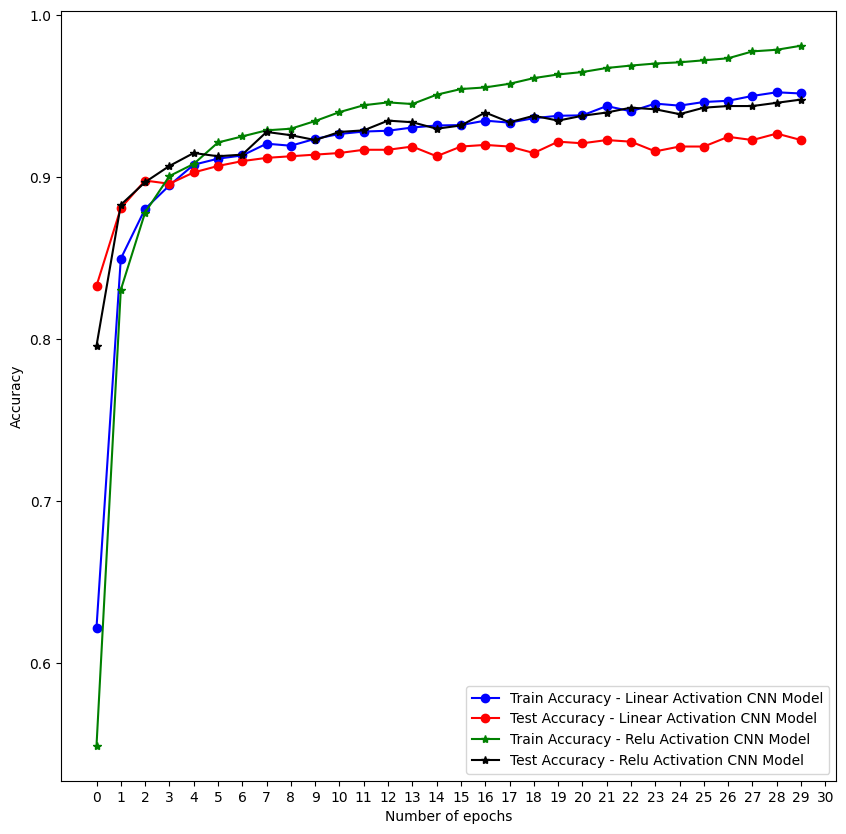

In [153]:
plt.figure(figsize=(10, 10))
plt.plot(history_first_cnn.history['accuracy'], 'bo-', label='Train Accuracy - Linear Activation CNN Model')
plt.plot(history_first_cnn.history['val_accuracy'], 'ro-', label='Test Accuracy - Linear Activation CNN Model')
plt.plot(history_relu_cnn.history['accuracy'], 'g*-', label='Train Accuracy - Relu Activation CNN Model')
plt.plot(history_relu_cnn.history['val_accuracy'], 'k*-', label='Test Accuracy - Relu Activation CNN Model')

plt.xticks(range(0, 31))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()

## CNN - Effect of Regularization

Let's try to make a Netowrk more complex, by adding the Dropout regularization


In [154]:
#define the convnet
model_relu_reg_cnn = Sequential()
# CONV => RELU => CONV => RELU => DROPOUT => POOL
model_relu_reg_cnn.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model_relu_reg_cnn.add(Activation('relu'))
model_relu_reg_cnn.add(Dropout(0.5))
model_relu_reg_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# FLATTERN => DENSE => RELU => DROPOUT
model_relu_reg_cnn.add(Flatten())
model_relu_reg_cnn.add(Dense(512))
model_relu_reg_cnn.add(Activation('relu'))
model_relu_reg_cnn.add(Dropout(0.5))
# a softmax classifier
model_relu_reg_cnn.add(Dense(num_classes))
model_relu_reg_cnn.add(Activation('softmax'))

model_relu_reg_cnn.summary()


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_82 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 dropout_15 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        (None, 6272)              0         
                                                                 
 dense_52 (Dense)            (None, 512)               3211776   
                                                     

In [155]:
model_relu_reg_cnn.compile(loss='categorical_crossentropy',
                        optimizer=keras.optimizers.SGD(),
                        metrics=['accuracy'])

history_relu_reg_cnn = model_relu_reg_cnn.fit(X_train, y_train_cat,
                                        batch_size=32,
                                        epochs=30,
                                        validation_data=(X_test, y_test_cat),
                                        shuffle=True)

model_relu_reg_cnn.save(r'./data/model_relu_reg_cnn', save_format='h5')
pd.DataFrame(history_relu_reg_cnn.history).to_csv('./data/history_relu_reg_cnn.csv')


Epoch 1/30
125/125 [==============================] - 6s 45ms/step - loss: 1.6289 - accuracy: 0.5175 - val_loss: 1.0641 - val_accuracy: 0.8450
Epoch 2/30
125/125 [==============================] - 5s 40ms/step - loss: 0.6492 - accuracy: 0.8090 - val_loss: 0.6289 - val_accuracy: 0.8960
Epoch 3/30
125/125 [==============================] - 6s 44ms/step - loss: 0.4772 - accuracy: 0.8585 - val_loss: 0.5171 - val_accuracy: 0.9060
Epoch 4/30
125/125 [==============================] - 5s 40ms/step - loss: 0.3971 - accuracy: 0.8852 - val_loss: 0.4665 - val_accuracy: 0.9130
Epoch 5/30
125/125 [==============================] - 5s 38ms/step - loss: 0.3598 - accuracy: 0.8888 - val_loss: 0.4240 - val_accuracy: 0.9150
Epoch 6/30
125/125 [==============================] - 5s 42ms/step - loss: 0.3289 - accuracy: 0.8978 - val_loss: 0.4059 - val_accuracy: 0.9190
Epoch 7/30
125/125 [==============================] - 5s 42ms/step - loss: 0.2925 - accuracy: 0.9065 - val_loss: 0.3762 - val_accuracy: 0.9210

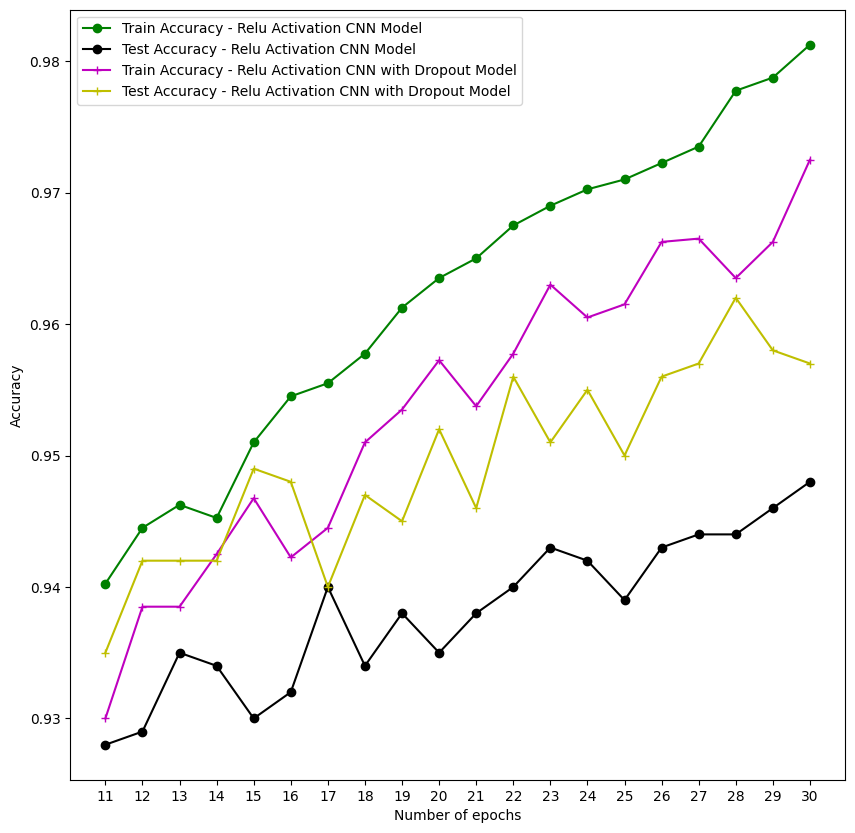

In [159]:
plt.figure(figsize=(10, 10))
plt.plot(range(11, 31), history_relu_cnn.history['accuracy'][10:], 'go-', label='Train Accuracy - Relu Activation CNN Model')
plt.plot(range(11, 31), history_relu_cnn.history['val_accuracy'][10:], 'ko-', label='Test Accuracy - Relu Activation CNN Model')
plt.plot(range(11, 31), history_relu_reg_cnn.history['accuracy'][10:], 'm+-', label='Train Accuracy - Relu Activation CNN with Dropout Model')
plt.plot(range(11, 31), history_relu_reg_cnn.history['val_accuracy'][10:], 'y+-', label='Test Accuracy - Relu Activation CNN with Dropout Model')

plt.xticks(range(11, 31))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()

We observe that the Dropout layer helped to reduce hte difference between the Train and Test accuracy. While the overall accuracy is smaller, still the model that we get is more generalizable


### Excercise 1

Try to improve the result with the CNN by 

* Adding more layers
* Changing the optimizer to Adam
* Increasing the number of epochs


# References

- Scikit-learn [supervised learning tutorial](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html).
- [Tuning meta-parameters](http://scikit-learn.org/stable/modules/grid_search.html#grid-search) with cross validation.
- [One of the best notebooks for ML](https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook)

# Futher exercise

- [Regression with a linear model](../exercises/linear-model.ipynb)
- [Classification with a logistic model](../exercises/logistic-tennis.ipynb)